<font size="5" color='red'> <b> This code computes the failure/yield envelope and the circles <b> </font>

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import linregress
from scipy.signal import butter,filtfilt, find_peaks

In [2]:
## This function creates the shape of the Mohr circle based on sigma 1 (Max stress) and sigma 3 (confining pressure) of the tests

def Generate_Mohr_circle(Sigma1, Sigma3):
    ra = (Sigma1-Sigma3)/2
    ca = (Sigma1+Sigma3)/2
    theta = np.linspace(0,180,1000) * np.pi/180


    mohr_x = ra * np.cos(theta) + ca
    mohr_y = ra * np.sin(theta)

    return mohr_x, mohr_y

In [3]:
def mohr_coulomb(s1a, s3a, s1b, s3b):
#  Find the parameters necessary to draw the Mohr-Coulomb failure envelope
#  Idea behind function:
#        With the function we try to find the Tangent points on outside
#        of the circles. We then connect a line between the two tangent
#        points.
#        To make sure my script works, I need my "first" circle to be located
#        to the left, and the "second" circle to be located to the right.
#        This requirement is the first step in the script below. To do this,
#        we create a temporary matrix M

    M = ([(s1a-s3a)/2,(s1a+s3a)/2],
         [(s1b-s3b)/2,(s1b+s3b)/2])
    # Min_point = np.minimum(M[:1])
    Min_point = M[0]
    ca = ([Min_point[1], 0])
    ra = Min_point[0]
    # print(ca, ra)
    Max_point = M[1]
    cb = ([Max_point[1], 0])
    rb = Max_point[0]
#     print(cb, rb)

    a21 = cb[0]-ca[0]
    b21 = cb[1]-ca[1]
    d2 = a21**2 + b21**2
    r21 = (rb-ra)/d2
    # print(a21)


    s21 = np.sqrt(d2-(rb-ra)**2)/d2

    u1 = ([-a21*r21-b21*s21,-b21*r21+a21*s21]) # Left unit vector
    u2 = ([-a21*r21+b21*s21,-b21*r21-a21*s21])# Right unit vector
    # print(u1,u2)


    L1 = np.add([ca[0],ca[1]], np.multiply(ra,u1))
    L2 = np.add([cb[0],cb[1]], np.multiply(rb,u1)) # Left line tangency points
    R1 = np.add([ca[0],ca[1]], np.multiply(ra,u2))
    R2 = np.add([cb[0],cb[1]], np.multiply(rb,u2)) # Right line tangency points

    theta = np.linspace(0,180,1000)*(np.pi/180)                      # Potential range of Theta

    mohr_x1 = ra * np.cos(theta) + ca[0]
    mohr_y1 = ra * np.sin(theta) + ca[1]
   
    mohr_x2 = rb * np.cos(theta) + cb[0]
    mohr_y2 = rb * np.sin(theta) + cb[1]

    ##Now we wish to export the tangent line as Y = aX + b:
    x = [L1[0], L2[0]]
    y = [L1[1], L2[1]]
    c = np.linalg.solve(([1, x[0]],[1, x[1]]), np.transpose(y))                        # Calculate Parameter Vector
    a = c[1]
    b = c[0]
    # print(a, b)

    theta = np.pi-(np.arctan(np.absolute(u1[1])/np.absolute(u1[0])))

    return theta, a, b


In [9]:
First_var = 20             # Sigma1 for first circle
Second_var = 70            # Sigma1 for second circle

CP1 = 0                    # Sigma3 for first circle
CP2 = 10                   # Sigma3 for second circle

theta12,a12,b12 = mohr_coulomb(First_var, CP1, Second_var, CP2)

xrange = np.linspace(-10,50)                         # If you want the line longer or shorter you can change the limits
y_12 = a12*xrange+b12                               # Line with slope a05 failure

mohr_x1,mohr_y1 = Generate_Mohr_circle(First_var, CP1)
mohr_x2,mohr_y2 = Generate_Mohr_circle(Second_var, CP2)

Text(0, 0.5, '$\\tau [MPa]$')

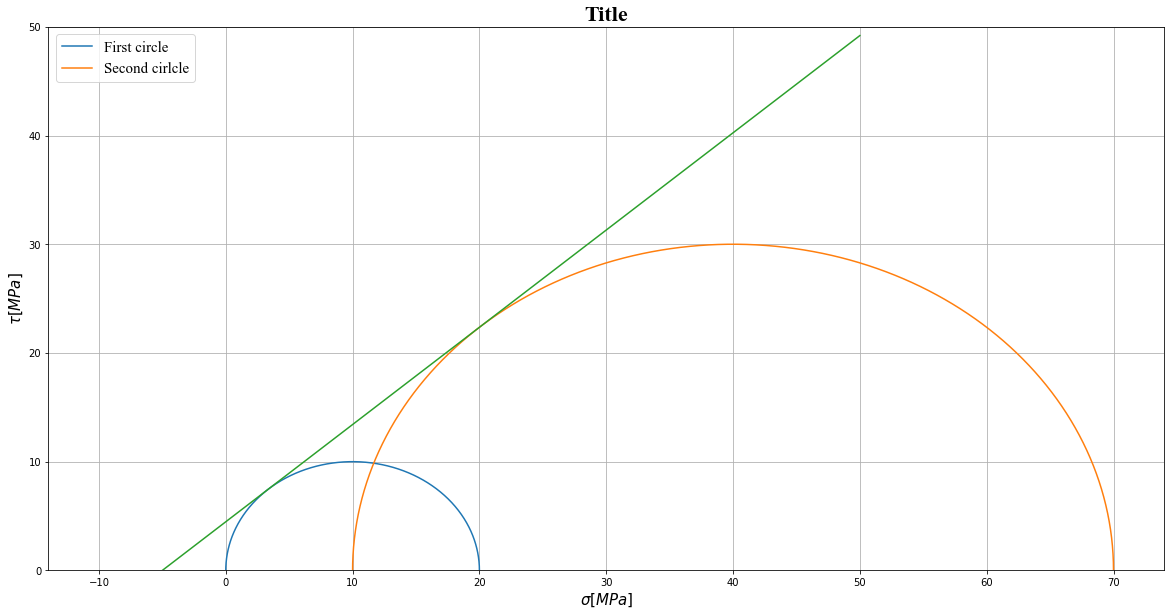

In [13]:
## Plot of the different Mohr circles

csfont = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 15}

tfont = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 22}



# csfont = {'fontname':'Times New Roman'}

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(mohr_x1,mohr_y1, label='First circle')
ax.plot(mohr_x2,mohr_y2, label='Second cirlcle')
ax.plot(xrange,y_12)
ax.grid()
# ax.set_xlim(0, 220)
ax.set_ylim(0, 50)
plt.legend(loc='upper left', prop=csfont)
plt.title('Title',**tfont)
plt.xlabel(r'$\sigma [MPa]$', **csfont)
plt.ylabel(r'$\tau [MPa]$', **csfont)